### Foundamental property
|name|value|
|---|---|
|Ink type|benzyl alcohol|
|dynamic viscosity|5.84 mPa · s|[^1]
|surface tension|45.95 mN/m|[^2]
|Ball diameter|0.75-1 mm(medium)|[^3] 
|Written Angle|60-70|
|Load|1N|[^3]
|Writing velocity|4.5-5 m/min|[^3]
|Film thickness|10um|[^4]
|paper smoothness|3um|

Assume the ink is newtonian




### Surface tension

Force required to break surface tension

                            F = surface tension * 2*pi*r

minimum force required is: 2.17e-04 N
largest force required is: 2.89e-04 N


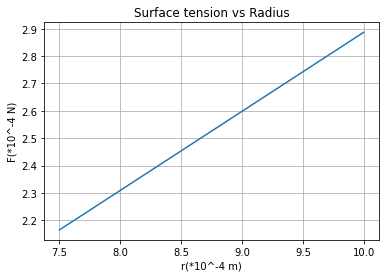

In [58]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

surface_tension = 45.95*10**-3
r = np.linspace(0.75*10**-3,1*10**-3,100)
F_friction = np.array([i*surface_tension*2*pi for i in r])

plt.plot(r*10000,F_friction*10000)
plt.title('Surface tension vs Radius')
plt.ylabel('F(*10^-4 N)')
plt.xlabel('r(*10^-4 m)')
plt.grid()

print('minimum force required is: {:.2e} N\nlargest force required is: {:.2e} N'.format(min(F_friction),max(F_friction)))

### Friction

The friction between ball and paper is rolling friction and is considered as static friction since there is no slip.

The type of luberication is  

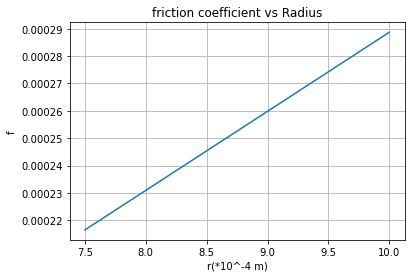

In [27]:
P = 1
f_coeff = F_friction/P
plt.plot(r*10000,f_coeff)
plt.title('friction coefficient vs Radius')
plt.ylabel('f')
plt.xlabel('r(*10^-4 m)')
plt.grid()

### contact surface between ball and paper

source from Friction Dynamics : Principles and Applications

https://www.azom.com/properties.aspx?ArticleID=1203

http://www.mate.tue.nl/mate/pdfs/10509.pdf

http://www.fibtex.lodz.pl/2008/4/117.pdf

|material|Young|Poission|hardness|
|---|---|---|---|
|Tungsten Carbide|600GPa|0.2-0.22|17GPa|
|print paper|10.5GPa|0.25-0.35|N/A|

                E_star = [(1-v1^2)/E1+(1-v2^2)/E2]^-1
                R = [1/R1+1/R2]^-1
                a=(3RP/4E_star)^1/3
                A=pi*a^2

In [70]:
E1 = 600
E2 = 10.5
v1_sq = np.array([0.2**2,0.22**2])
v2_sq = np.array([0.25**2,0.35**2])
E_star = [(1-v1_sq)/E1+(1-v2_sq)/E2]
E_star = np.array([i**-1*1000 for i in E_star]) #GPa

R = np.array([0.75,1]) #mm
P = 1
a_max = (3*R[1]*P/(4*E_star[0][0]))**(1/3)
a_min = (3*R[0]*P/(4*E_star[0][1]))**(1/3)


Area_max = a_max**2*pi
Area_min = a_min**2*pi

df = pd.DataFrame({'a(mm)': [a_min,a_max], 'Area(mm^2)':[Area_min,Area_max]},index = ['min','max'])
df

,a(mm),Area(mm^2)
min,0.036317,0.004144
max,0.040849,0.005242


### Pressure at the ball and hardness
                                        Pressure = P/A

In [71]:
Pressure_max = P/Area_max
Pressure_min = P/Area_min
df['pressure (MPa)'] = [Pressure_min,Pressure_max]
df

,a(mm),Area(mm^2),pressure (MPa)
min,0.036317,0.004144,241.334874
max,0.040849,0.005242,190.756291


### Friction of lubricant